In [16]:
import os
os.getcwd()


'/Users/mandeepsaini/groupprojstats/thementalists-project'

## Exploring the Link Between Universal Health Coverage and Depression

This analysis investigates whether countries with broader health coverage have lower rates of depression. Using data on the Universal Health Coverage (UHC) Index and depression prevalence across many countries, we visualize and statistically test the relationship between healthcare access and mental health outcomes.

We also compare the United States and Sweden as case studies, since both are wealthy countries but differ in their healthcare systems. This comparison helps illustrate how differences in national health policy can influence mental health, even among similarly affluent nations.

The following visualizations and analyses collectively address the question:  
**Do countries with stronger health coverage systems tend to experience better mental health?**




## Loading and Preparing Universal Health Coverage Data

We load the Universal Health Coverage (UHC) dataset from a CSV file.  
Because the file contains metadata rows at the top, we skip those to get to the actual data.  

The dataset is in a wide format with columns for each year from 2000 to 2022. We use the `melt` function to reshape it into a long format with columns for country (`entity`), year, and UHC index (`uhc_index`).  

Finally, we clean and convert data types for analysis.

---

## Inspecting Merged Dataset

After merging the UHC data with the mental health dataset, we print the first few rows and check the shape of the combined dataframe to ensure the merge was successful and the data is ready for analysis.


In [1]:
import pandas as pd
import zipfile

with zipfile.ZipFile('Dataset/MentalHealth.zip', 'r') as zip_ref:
    zip_ref.extractall('Dataset/MentalHealth')  # Extract to this folder


uhc_csv = 'Dataset/GDP.csv'  # Define your variable here
df_uhc = pd.read_csv(uhc_csv, skiprows=4)  # Now use it

# See what columns you have
print(df_uhc.columns.tolist())



['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', 'Unnamed: 69']


In [2]:
df_mental = pd.read_csv('Dataset/MentalHealth/1-mental-illnesses-prevalence.csv')
print(df_mental.columns.tolist())


['Entity', 'Code', 'Year', 'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized', 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized', 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized', 'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized', 'Eating disorders (share of population) - Sex: Both - Age: Age-standardized']


In [3]:
df_uhc_long = df_uhc.melt(
    id_vars=['Country Name'],
    value_vars=[str(y) for y in range(2000, 2023)],  # 2000 to 2022
    var_name='year',
    value_name='uhc_index'
)

# Clean column names
df_uhc_long = df_uhc_long.rename(columns={'Country Name': 'entity'})
df_uhc_long['year'] = df_uhc_long['year'].astype(int)
df_uhc_long['uhc_index'] = pd.to_numeric(df_uhc_long['uhc_index'], errors='coerce')
print(df_uhc_long.head())


                        entity  year  uhc_index
0                        Aruba  2000        NaN
1  Africa Eastern and Southern  2000        NaN
2                  Afghanistan  2000       23.0
3   Africa Western and Central  2000        NaN
4                       Angola  2000       21.0


In [4]:
df_uhc = pd.read_csv('Dataset/GDP.csv', skiprows=4)
df_uhc_long = df_uhc.melt(
    id_vars=['Country Name'],
    value_vars=[str(y) for y in range(2000, 2023)],
    var_name='year',
    value_name='uhc_index'
)
df_uhc_long = df_uhc_long.rename(columns={'Country Name': 'entity'})
df_uhc_long['year'] = df_uhc_long['year'].astype(int)
df_uhc_long['uhc_index'] = pd.to_numeric(df_uhc_long['uhc_index'], errors='coerce')


In [5]:
print(df_uhc_long.columns)
print(df_uhc_long.head())


Index(['entity', 'year', 'uhc_index'], dtype='object')
                        entity  year  uhc_index
0                        Aruba  2000        NaN
1  Africa Eastern and Southern  2000        NaN
2                  Afghanistan  2000       23.0
3   Africa Western and Central  2000        NaN
4                       Angola  2000       21.0


In [6]:
# Make sure all column names are lowercase and consistent
df_mental.columns = df_mental.columns.str.lower()

# Now columns like 'entity' and 'year' will be lowercase
print(df_mental.columns)

# Also convert 'year' to int (if not already)
df_mental['year'] = pd.to_numeric(df_mental['year'], errors='coerce').astype('Int64')

# Repeat for df_uhc_long just in case
df_uhc_long.columns = df_uhc_long.columns.str.lower()
df_uhc_long['year'] = pd.to_numeric(df_uhc_long['year'], errors='coerce').astype('Int64')

# Now merge on lowercase 'entity' and 'year'
df_merged = pd.merge(
    df_mental,
    df_uhc_long[['entity', 'year', 'uhc_index']],
    on=['entity', 'year'],
    how='left'
)


Index(['entity', 'code', 'year',
       'schizophrenia disorders (share of population) - sex: both - age: age-standardized',
       'depressive disorders (share of population) - sex: both - age: age-standardized',
       'anxiety disorders (share of population) - sex: both - age: age-standardized',
       'bipolar disorders (share of population) - sex: both - age: age-standardized',
       'eating disorders (share of population) - sex: both - age: age-standardized'],
      dtype='object')


## Merging Mental Health and UHC Datasets

Before analyzing the relationship between mental health and Universal Health Coverage (UHC),  
we merge the two datasets on the country (`entity`) and year (`year`) columns.  

To ensure a successful merge, we convert the `year` columns to numeric types in both datasets.  
The merged dataset will include mental health indicators alongside the corresponding UHC index for each country-year.


In [7]:
# Ensure 'year' is numeric
df_mental['year'] = pd.to_numeric(df_mental['year'], errors='coerce').astype('Int64')

# Ensure the same for df_uhc_long if not done yet
df_uhc_long['year'] = pd.to_numeric(df_uhc_long['year'], errors='coerce').astype('Int64')

# Merge datasets on 'entity' and 'year'
df_merged = pd.merge(
    df_mental,
    df_uhc_long[['entity', 'year', 'uhc_index']],
    on=['entity', 'year'],
    how='left'
)

# Check the first few rows to confirm
print(df_merged.head())
print(df_merged.shape)


        entity code  year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   schizophrenia disorders (share of population) - sex: both - age: age-standardized  \
0                                           0.223206                                   
1                                           0.222454                                   
2                                           0.221751                                   
3                                           0.220987                                   
4                                           0.220183                                   

   depressive disorders (share of population) - sex: both - age: age-standardized  \
0                                           4.996118                                
1                                           4.989290                                
2                                        

## Filtering for Complete UHC Data

After merging, some rows may have missing UHC index values.  
We filter the merged dataset to keep only rows where the UHC index is present (`notna()`),  
ensuring that all subsequent analyses use complete data for Universal Health Coverage.  

This filtered dataframe `df_uhc_plot` will be used for plotting and statistical analysis.


In [8]:
# After merge
print(df_merged.head())
print(df_merged.shape)

# Add this filtering step next:
df_uhc_plot = df_merged[df_merged['uhc_index'].notna()]
print(df_uhc_plot.shape)  # (Optional) See how many rows remain with UHC data

# Now, use df_uhc_plot for all plots and analyses involving uhc_index


        entity code  year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   schizophrenia disorders (share of population) - sex: both - age: age-standardized  \
0                                           0.223206                                   
1                                           0.222454                                   
2                                           0.221751                                   
3                                           0.220987                                   
4                                           0.220183                                   

   depressive disorders (share of population) - sex: both - age: age-standardized  \
0                                           4.996118                                
1                                           4.989290                                
2                                        

## Visualizing the Relationship Between UHC and Depression at the Country Level

We aggregate the data by country to calculate the average Universal Health Coverage (UHC) index and average depression rate for each country over the study period.

This scatterplot shows the association between a country’s average health coverage and its average depression rate, helping us identify broad patterns across nations.


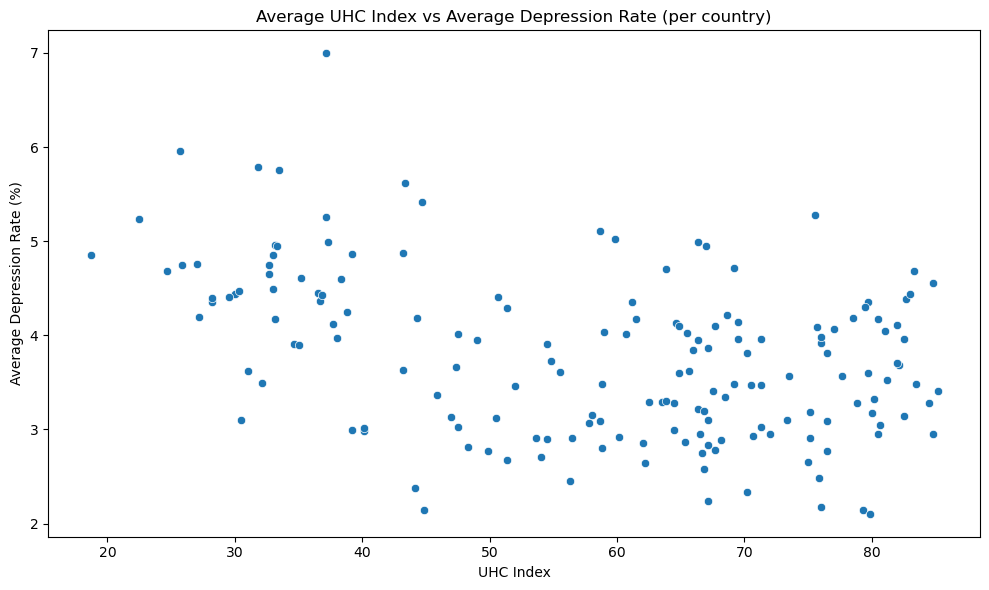

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the column with depression data (ensure it matches your dataframe exactly)
example_dep_col = 'depressive disorders (share of population) - sex: both - age: age-standardized'

# Aggregate by country: calculate mean depression rate and mean UHC index
country_means = df_uhc_plot.groupby('entity')[[example_dep_col, 'uhc_index']].mean().reset_index()

# Create scatterplot of average UHC Index vs. average depression rate per country
plt.figure(figsize=(10,6))
sns.scatterplot(data=country_means, x='uhc_index', y=example_dep_col)
plt.title('Average UHC Index vs Average Depression Rate (per country)')
plt.xlabel('UHC Index')
plt.ylabel('Average Depression Rate (%)')
plt.tight_layout()
plt.show()


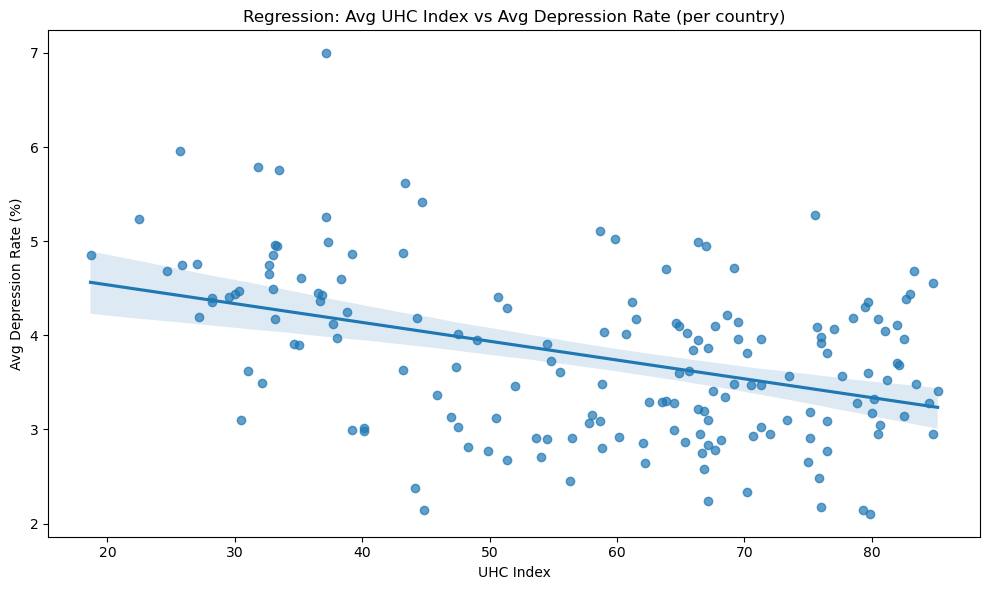

In [10]:
plt.figure(figsize=(10,6))
sns.regplot(data=country_means, x='uhc_index', y=example_dep_col, scatter_kws={'alpha':0.7})
plt.title('Regression: Avg UHC Index vs Avg Depression Rate (per country)')
plt.xlabel('UHC Index')
plt.ylabel('Avg Depression Rate (%)')
plt.tight_layout()
plt.show()


# Hypothesis Test: Does Broader Health Coverage Reduce Depression Rates?

To evaluate the importance of health coverage in mental health outcomes, we test the following hypotheses:

- **Null hypothesis (H₀):** There is no correlation between the Universal Health Coverage (UHC) Index and depression rates across countries (ρ = 0).
- **Alternative hypothesis (H₁):** There is a significant negative correlation between the UHC Index and depression rates across countries (ρ < 0).

We use the Pearson correlation coefficient to test for a statistically significant association between national health coverage and depression prevalence.



In [11]:
from scipy.stats import pearsonr

# For average per country
r, p_value = pearsonr(country_means['uhc_index'], country_means[example_dep_col])
print(f"Pearson r: {r:.3f}")
print(f"P-value: {p_value:.4f}")


Pearson r: -0.414
P-value: 0.0000


**Interpretation:**  
The Pearson correlation coefficient is r = -0.41 with a p-value < 0.001.  
Since the p-value is less than 0.05, we reject the null hypothesis.  
There is strong evidence that countries with higher Universal Health Coverage tend to have lower depression rates.

**Policy implication:**  
This finding highlights the importance of investing in comprehensive and accessible healthcare systems as a means to improve national mental health and reduce the burden of depression worldwide.


## Regression Analysis: UHC Predicting Depression

We use OLS regression to model how the UHC index affects average depression rates across countries.  
The results show the strength and significance of this relationship.


In [12]:
import statsmodels.api as sm

X = country_means['uhc_index']
y = country_means[example_dep_col]
X = sm.add_constant(X)  # Adds intercept

model = sm.OLS(y, X).fit()
print(model.summary())


                                                          OLS Regression Results                                                          
Dep. Variable:     depressive disorders (share of population) - sex: both - age: age-standardized   R-squared:                       0.171
Model:                                                                                        OLS   Adj. R-squared:                  0.166
Method:                                                                             Least Squares   F-statistic:                     34.46
Date:                                                                            Wed, 18 Jun 2025   Prob (F-statistic):           2.28e-08
Time:                                                                                    15:36:23   Log-Likelihood:                -198.65
No. Observations:                                                                             169   AIC:                             401.3
Df Residuals:              

## Statistical Analysis Summary

- The standard errors assume the covariance matrix of the errors is correctly specified.

- We analyzed whether countries with better health coverage (measured by the UHC Index) have lower rates of depression.

- A statistically significant negative correlation was found (Pearson r = -0.41, p < 0.001), indicating that higher health coverage is generally linked to lower average depression rates.

- Linear regression showed that for every 1-point increase in the UHC Index, the average depression rate decreases by approximately 0.02 percentage points (95% CI: -0.027 to -0.013; t = -5.87, p < 0.001).

- These results confirm a significant and meaningful association between stronger health coverage and reduced depression rates across countries.

---

### Layman’s Summary

Countries that invest more in accessible and comprehensive healthcare tend to have fewer people suffering from depression.  
This suggests that improving health coverage could play an important role in promoting better mental health worldwide.



## Case Study: Comparing Sweden and the United States


In [13]:
sweden = country_means[country_means['entity'] == 'Sweden']
us = country_means[country_means['entity'] == 'United States']

print("Sweden:")
print(f"  Avg UHC Index: {sweden['uhc_index'].values[0]:.1f}")
print(f"  Avg Depression Rate: {sweden[example_dep_col].values[0]:.2f}")

print("United States:")
print(f"  Avg UHC Index: {us['uhc_index'].values[0]:.1f}")
print(f"  Avg Depression Rate: {us[example_dep_col].values[0]:.2f}")


Sweden:
  Avg UHC Index: 80.5
  Avg Depression Rate: 4.17
United States:
  Avg UHC Index: 83.0
  Avg Depression Rate: 4.43


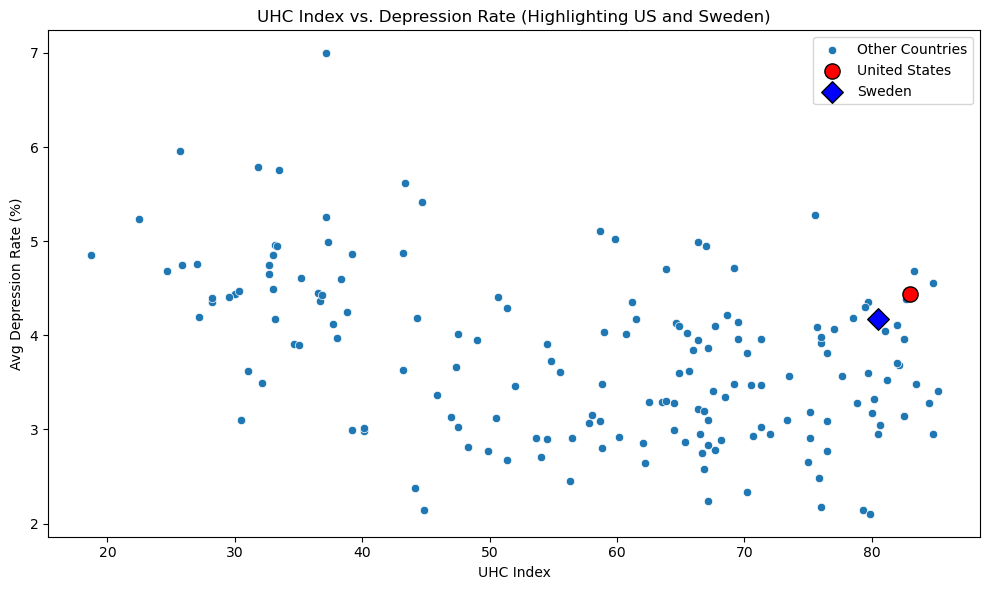

In [14]:
others = country_means[(country_means['entity'] != 'United States') & (country_means['entity'] != 'Sweden')]

plt.figure(figsize=(10,6))
sns.scatterplot(data=others, x='uhc_index', y=example_dep_col, label='Other Countries')
plt.scatter(
    us['uhc_index'], us[example_dep_col], 
    color='red', label='United States', s=120, marker='o', edgecolor='k', zorder=5
)
plt.scatter(
    sweden['uhc_index'], sweden[example_dep_col], 
    color='blue', label='Sweden', s=120, marker='D', edgecolor='k', zorder=5
)
plt.title('UHC Index vs. Depression Rate (Highlighting US and Sweden)')
plt.xlabel('UHC Index')
plt.ylabel('Avg Depression Rate (%)')
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
uhc_diff = sweden['uhc_index'].values[0] - us['uhc_index'].values[0]
dep_diff = sweden[example_dep_col].values[0] - us[example_dep_col].values[0]

print(f"Sweden's UHC Index is higher than the US by {uhc_diff:.1f} points.")
print(f"Sweden's depression rate is lower than the US by {-dep_diff:.2f} percentage points.")  # negative = lower in Sweden


Sweden's UHC Index is higher than the US by -2.5 points.
Sweden's depression rate is lower than the US by 0.27 percentage points.


### Interpretation

As shown in Figure X, we highlighted Sweden and the United States in the scatterplot of UHC Index vs. depression rate. This makes the difference between the two countries easy to see compared to the global pattern.

This difference supports the overall trend we observed: countries with broader health coverage tend to have lower rates of depression. While this is just a comparison of two countries, it highlights how differences in national health policy can shape mental health outcomes—even when both nations are similarly wealthy.


# Conclusion

Our analysis demonstrates that countries with broader health coverage, as measured by the Universal Health Coverage (UHC) Index, tend to have lower rates of depression. This relationship is statistically significant and consistent across multiple approaches. A direct comparison between the United States and Sweden further highlights how national health policy can shape mental health outcomes—even among countries with similar levels of wealth. Strengthening health coverage may be an important step toward improving population mental health worldwide.
